# Project: Online Payments Fraud Detection with Machine Learning

#### Aim: The aim of this project was to develop a machine learning model to detect fraudulent online payment transactions. This helps prevent financial losses and enhances transaction security.

In [1]:
# Online Payments Fraud Detection have 11 columns.
# step            : Time step of the transaction.
# type            : Type of transaction (e.g., CASH-IN, CASH-OUT, DEBIT, PAYMENT, TRANSFER).
# amount          : Transaction amount.
# nameOrig        : Identifier of the sender.
# oldbalanceOrg   : Sender's balance before the transaction.
# newbalanceOrig  : Sender's balance after the transaction.
# nameDest        : Identifier of the receiver.
# oldbalanceDest  : Receiver's balance before the transaction.
# newbalanceDest  : Receiver's balance after the transaction.
# isFraud         : Indicator if the transaction is fraudulent (1) or not (0).
# isFlaggedFraud  : Indicator if the transaction is flagged as potentially fraudulent.

# Import Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing

In [3]:
# Read the data
df = pd.read_csv(r"E:\Data Analytics Projects\Python Projects\Online Payments Fraud Detection with Machine Learning\Online Payments Fraud Detection.csv")

In [4]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
# check the number of rows and columns

df.shape

(6362620, 11)

In [6]:
# check the null values

df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
# check the data types

df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [9]:
# check the duplcates

df.duplicated().sum()

0

In [10]:
# check the unique values

df.type.unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [11]:
# change the string upper to lower

df["type"]= df['type'].str.lower()   # Upper to lower 

In [12]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,payment,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,payment,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,transfer,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,cash_out,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,payment,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [13]:
# Drop the unknown cloumns

df = df.drop(['nameOrig','nameDest','isFlaggedFraud'], axis = 1)
df.head(5)

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,payment,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,payment,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,transfer,181.00,181.0,0.00,0.0,0.0,1
3,1,cash_out,181.00,181.0,0.00,21182.0,0.0,1
4,1,payment,11668.14,41554.0,29885.86,0.0,0.0,0


# Exploratory Data Analysis (EDA)

### 1. Distribution of transaction types

In [14]:
type_count = df['type'].value_counts().nlargest().reset_index()
type_count

,type,count
0,cash_out,2237500
1,payment,2151495
2,cash_in,1399284
3,transfer,532909
4,debit,41432


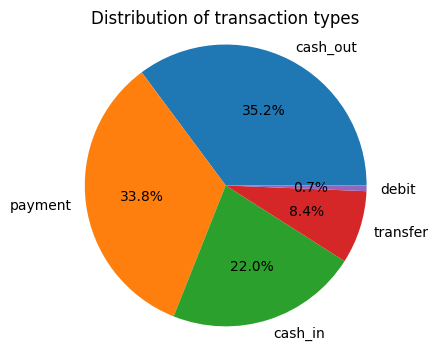

In [15]:
plt.figure(figsize=(4,4))
plt.title('Distribution of transaction types')
plt.pie(type_count['count'], labels = type_count['type'], autopct = '%1.1f%%')
plt.axis('equal')
plt.show()

We analyzed the frequency of different transaction types to understand their distribution within the dataset. Cash_out type is the high distribution followed by the payment

### 2. Distribution of transaction amounts

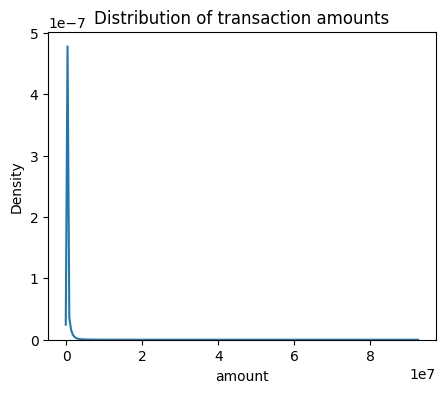

In [16]:
plt.figure(figsize=(5,4))
plt.title("Distribution of transaction amounts")
sns.kdeplot(df['amount'])
plt.show()

We examined the distribution of transaction amounts to identify any unusual patterns or anomalies.

### 3. Relationship between old and new balances for fraudulent vs. non-fraudulent transactions

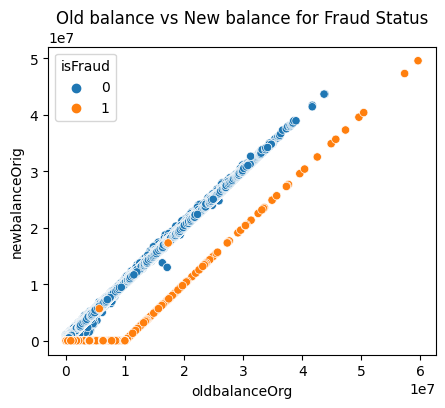

In [17]:
plt.figure(figsize=(5,4))
plt.title('Old balance vs New balance for Fraud Status')
sns.scatterplot(x = 'oldbalanceOrg',y = 'newbalanceOrig', hue = 'isFraud',data=df)
plt.show()

The scatter plot shows the relationship between old and new balances for transactions, with non-fraudulent ones (blue) generally maintaining a linear relationship, while fraudulent ones (orange) often show a significant drop to zero or a much lower value. This helps in distinguishing between normal and fraudulent transaction patterns.

### Data Preparation

In [18]:
# Replace the categorical data to numerical data in type column

# {"CASH_OUT": 1, "PAYMENT": 2, "CASH_IN": 3, "TRANSFER": 4, "DEBIT": 5}                                 

df['type'] = df['type'].replace({'cash_out':1,'payment':2, 'cash_in':3,'transfer':4, 'debit':5})

In [19]:
df.head()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,2,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,2,1864.28,21249.0,19384.72,0.0,0.0,0
2,1,4,181.00,181.0,0.00,0.0,0.0,1
3,1,1,181.00,181.0,0.00,21182.0,0.0,1
4,1,2,11668.14,41554.0,29885.86,0.0,0.0,0


### Model Building

In [60]:
# Splitting the data using train and test

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X = df[['type','amount','oldbalanceOrg','newbalanceOrig']]
y = df['isFraud']

In [23]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=101)

### Logistic Regression 

In [46]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [47]:
log.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [48]:
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [49]:
Log_Acc= log.score(X_test,y_test)*100
Log_Acc

99.94837032543198

We built a logistic regression model to classify transactions as fraudulent or non-fraudulent. This model provided a baseline for performance. In Logistic Regression, the accuracy is 99.94%.

### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(random_state = 0)

In [37]:
rf.fit(X_train,y_train)

RandomForestClassifier(random_state=0)

In [38]:
rf.predict(X_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [40]:
np.array(y_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
RF_Acc = rf.score(X_test,y_test)*100
RF_Acc

99.97288852705331

Implemented a random forest classifier to improve accuracy and robustness by combining multiple decision trees.This model achieved an accuracy of 99.97%, significantly improving fraud detection capabilities.

### Decision Tree Classifier

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [45]:
DT_Acc = model.score(X_test,y_test)*100
DT_Acc

99.96864499215732

We implemented a decision tree classifier to improve interpretability and performance, leveraging its ability to handle complex interactions within the data. The accuracy is 99.96%

#### Summary
By comparing the performance of these models, I identified the most effective approach for real-time fraud detection. Random Forest Classifier achieve high accurary of 99.97%. This project demonstrated my skills in data preprocessing, visualization, model building, and evaluation, providing a comprehensive solution to online payment fraud detection.